In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.read_csv('Airbnb_Listings.csv')
pd.set_option('display.max_columns',200)
data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,https://a0.muscach

In [4]:
data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.221000e+03,7.221000e+03,0.0,0.0,0.0,7.221000e+03,7220.000000,7220.000000,0.0,7221.000000,7221.000000,7221.000000,7220.000000,7215.000000,7153.000000,29.000000,7221.000000,7221.000000,7.221000e+03,7221.000000,7221.000000,7.221000e+03,7.221000e+03,7221.000000,7.221000e+03,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,7221.000000,5854.000000,5852.000000,5852.000000,5851.000000,5852.000000,5851.000000,5851.000000,0.0,7221.000000,7221.000000,7221.000000,7221.000000,5912.000000
mean,2.623922e+07,2.020053e+13,NaN,NaN,NaN,8.886443e+07,139.588504,139.588504,NaN,37.352285,-121.966600,3.114804,1.383449,1.421760,1.817000,691.000000,1.699349,9.756959,2.980880e+05,9.142916,14.247888,2.982325e+05,1.785205e+06,13.631505,1.538945e+06,13.689101,30.373494,48.260352,160.282648,29.853760,9.369201,95.245473,9.723855,9.572454,9.815074,9.793233,9.796103,9.527773,NaN,32.048608,28.216729,2.775793,1.029359,1.357124
std,1.236420e+07,1.781373e+00,NaN,NaN,NaN,9.390593e+07,472.674992,472.674992,NaN,0.064819,0.108587,2.370579,0.688715,0.999833,1.633911,735.833492,1.620945,34.689846,2.527150e+07,35.027086,63.358607,2.527150e+07,6.188084e+07,61.691820,5.347742e+07,13.616884,26.501026,38.981316,141.746896,51.488761,15.188236,7.734005,0.741816,0.848685,0.641301,0.691503,0.583498,0.833306,NaN,95.159193,95.714488,6.810433,5.741521,1.530782
min,4.952000e+03,2.020053e+13,NaN,NaN,NaN,7.054000e+03,0.000000,0.000000,NaN,36.965600,-122.190350,1.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.624242e+07,2.020053e+13,NaN,NaN,NaN,1.697278e+07,1.000000,1.000000,NaN,37.319770,-122.042450,2.000000,1.000000,1.000000,1.000000,225.000000,1.000000,1.000000,6.000000e+01,1.000000,1.000000,3.650000e+02,3.650000e+02,1.000000,3.650000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.320000
50%,2.818432e+07,2.020053e+13,NaN,NaN,NaN,4.800549e+07,3.000000,3.000000,NaN,37.358260,-121.961940,2.000000,1.000000,1.000000,1.000000,396.000000,1.000000,2.000000,1.125000e+03,2.000000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,10.000000,30.000000,59.000000,136.000000,10.000000,3.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,1.000000,1.000000,0.000000,0.830000
75%,3.749948e+07,2.020053e+13,NaN,NaN,NaN,1.429331e+08,10.000000,10.000000,NaN,37.398250,-121.886340,4.000000,2.000000,2.000000,2.000000,950.000000,2.000000,7.000000,1.125000e+03,5.000000,7.000000,1.125000e+03,1.125000e+03,7.000000,1.125000e+03,29.000000,59.000000,89.000000,323.000000,35.000000,12.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,8.000000,2.000000,3.000000,0.000000,1.810000
max,4.359134e+07,2.020053e+13,NaN,NaN,NaN,3.477992e+08,2007.000000,2007.000000,NaN,37.462980,-121.380120,16.000000,8.000000,9.000000,54.

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,https://a0.muscach

In [7]:
dup=data.isnull().sum()/data.shape[0]
pd.set_option('display.max_rows', dup.shape[0]+1)


print(dup)

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
name                                            0.000138
summary                                         0.041407
space                                           0.236394
description                                     0.032959
experiences_offered                             0.000000
neighborhood_overview                           0.370724
notes                                           0.488713
transit                                         0.427226
access                                          0.431658
interaction                                     0.411023
house_rules                                     0.313530
thumbnail_url                                   1.000000
medium_url                                      1.000000
picture_url                    

In [8]:
data.drop(['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_location','host_about','host_response_time','host_thumbnail_url','host_picture_url'], axis = 1)

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,7054,2009-01-24,100%,98%,t,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,42458,2009-09-30,100%,90%,f,Santa Clara,13.0,13.0,"['email', 'phone', 'reviews']",t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,NaN,Santa Clara,CA,95051,"South Bay, CA","Santa Clara, CA",US,United States,37.34342,-121.98829,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",325.0,$85.00,NaN,"$2,100.00",$700.00,$250.00,1,$10.00,14,365,14,14,365,365,14.0,365.0,5 months ago,t,30,60,90,179,2020-05-31,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,f,NaN,"{""SANTA CLARA""}",f,f,moderate,f,t,12,12,0,0,0.08
2,17884,69023,2010-01-08,100%,50%,f,Palo Alto,2.0,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Mountain View, CA, United States",Mountain View,Mountain View,NaN,Mountain View,CA,94041,"South Bay, CA","Mountain View, CA",US,United States,37.38612,-122.07357,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$65.00,"$1,400.00","$2,800.00","$1,000.00",NaN,1,$0.00,30,180,30,30,180,180,30.0,180.0,4 weeks ago,t,29,59,89,179,2020-05-31,2,0,2018-11-20,2019-04-27,90.0,8.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Mountain View"","" CA""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,7054,2009-01-24,100%,98%,t,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.44001,-122.15667,t,Villa,Private room,1,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,$99.00,$600.00,"$2,000.00",$0.00,$35.00,1,$50.00,2,730,2,2,730,730,2.0,730.0,3 weeks ago,t,0,0,0,212,2020-05-30,264,39,2010-05-28,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,2.17
4,37512,161741,2010-07-09,100%,100%,t,South San Jose,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"San Jose, CA, United States",South San Jose,San 

In [9]:
thresh = len(data)*0.6
data1 = data.dropna(thresh=thresh,axis=1)
dedup=data1.isnull().sum()/data1.shape[0]
dedup = dedup.sort_values(0)
print(dedup)

id                                              0.000000
minimum_nights_avg_ntm                          0.000000
maximum_maximum_nights                          0.000000
street                                          0.000000
minimum_maximum_nights                          0.000000
neighbourhood_cleansed                          0.000000
maximum_minimum_nights                          0.000000
minimum_minimum_nights                          0.000000
maximum_nights                                  0.000000
minimum_nights                                  0.000000
smart_location                                  0.000000
host_verifications                              0.000000
country_code                                    0.000000
latitude                                        0.000000
longitude                                       0.000000
is_location_exact                               0.000000
property_type                                   0.000000
room_type                      

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 94 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7221 non-null   int64  
 1   listing_url                                   7221 non-null   object 
 2   scrape_id                                     7221 non-null   int64  
 3   last_scraped                                  7221 non-null   object 
 4   name                                          7220 non-null   object 
 5   summary                                       6922 non-null   object 
 6   space                                         5514 non-null   object 
 7   description                                   6983 non-null   object 
 8   experiences_offered                           7221 non-null   object 
 9   neighborhood_overview                         4544 non-null   o

In [11]:
#data1.hist('price')

data1.price = data1.price.apply(lambda x:str(x).replace('$', '').strip())
data1.price.value_counts()

C:\Users\gaode\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


100.00      205
50.00       199
75.00       188
55.00       183
60.00       183
           ... 
2,054.00      1
242.00        1
680.00        1
254.00        1
284.00        1
Name: price, Length: 420, dtype: int64

In [12]:
data1.price = pd.to_numeric(data1.price,errors='coerce')




In [13]:
data1.neighbourhood_cleansed.value_counts()

San Jose                2882
Palo Alto                794
Sunnyvale                768
Santa Clara              711
Mountain View            664
Cupertino                325
Milpitas                 301
Unincorporated Areas     298
Campbell                 131
Los Gatos                 85
Los Altos                 73
Saratoga                  62
Los Altos Hills           52
Morgan Hill               42
Gilroy                    20
Monte Sereno              13
Name: neighbourhood_cleansed, dtype: int64

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

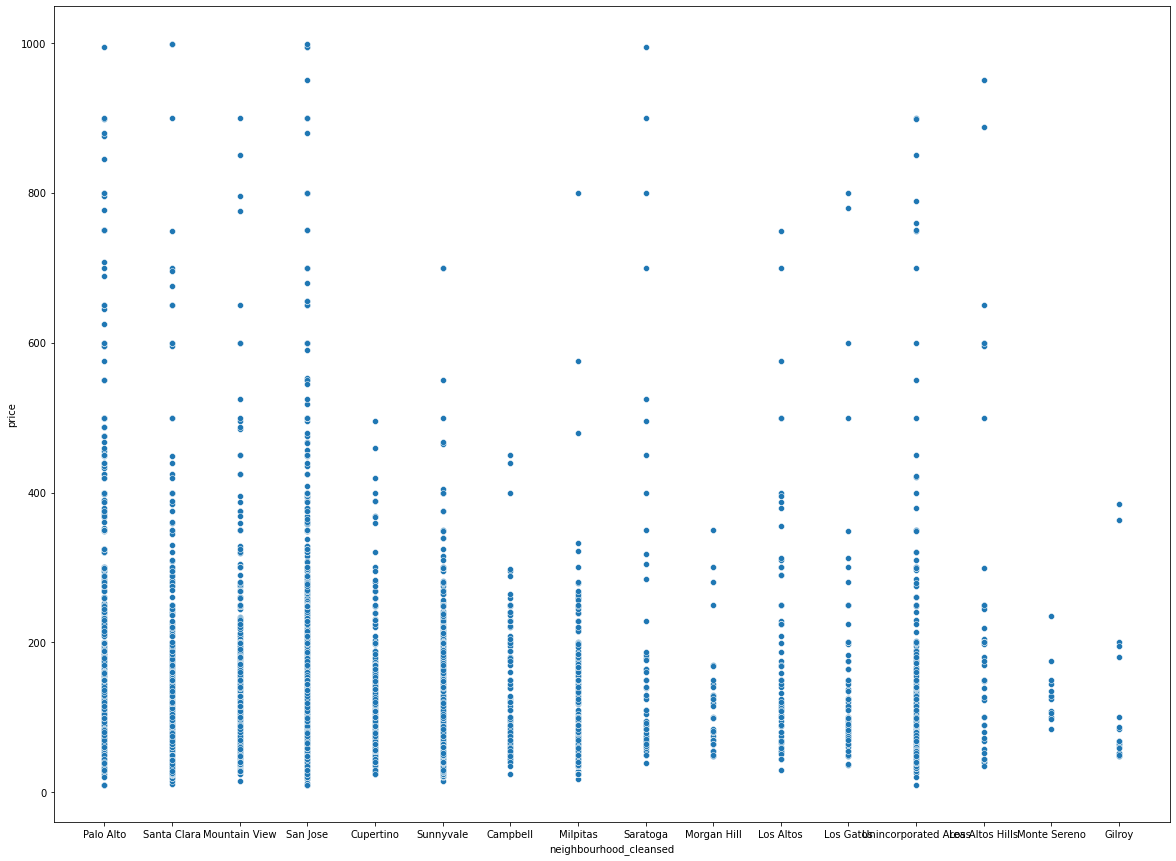

In [14]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="neighbourhood_cleansed", y="price", data=data1)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

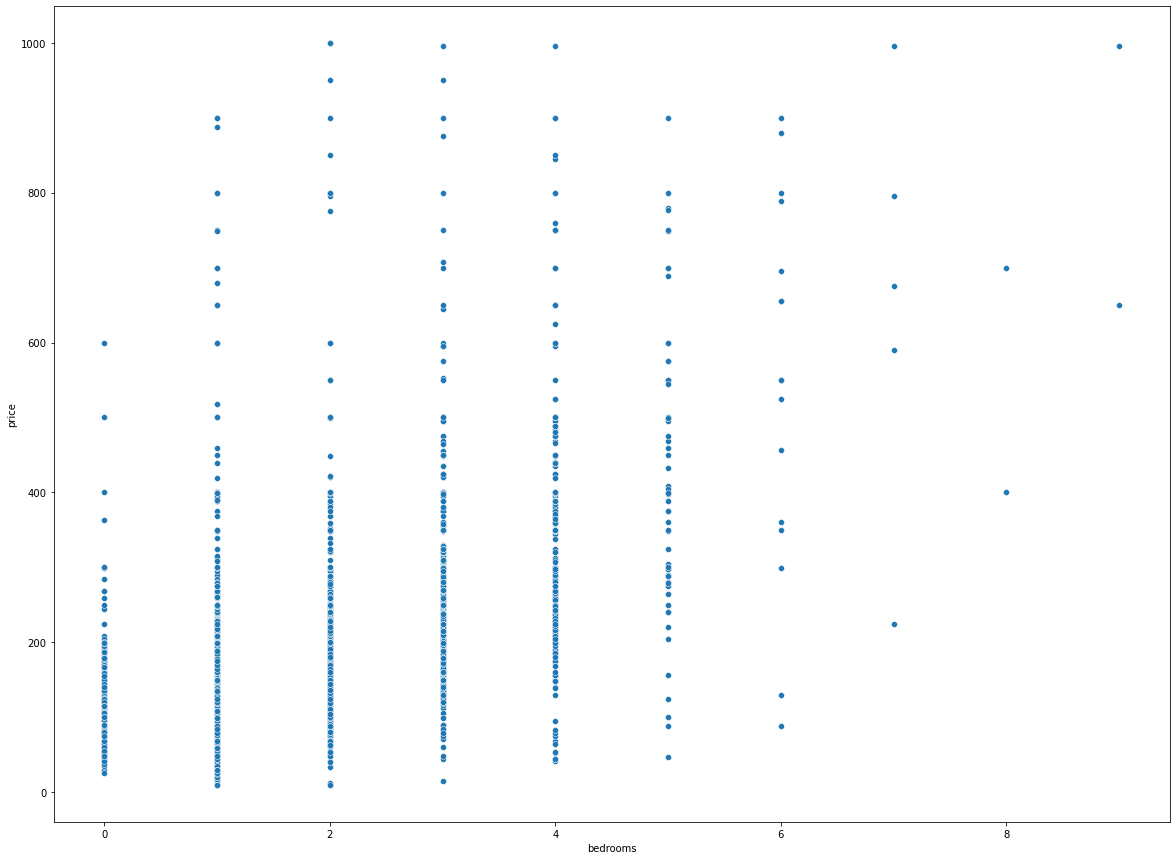

In [15]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="bedrooms", y="price", data=data1)

<AxesSubplot:xlabel='room_type', ylabel='price'>

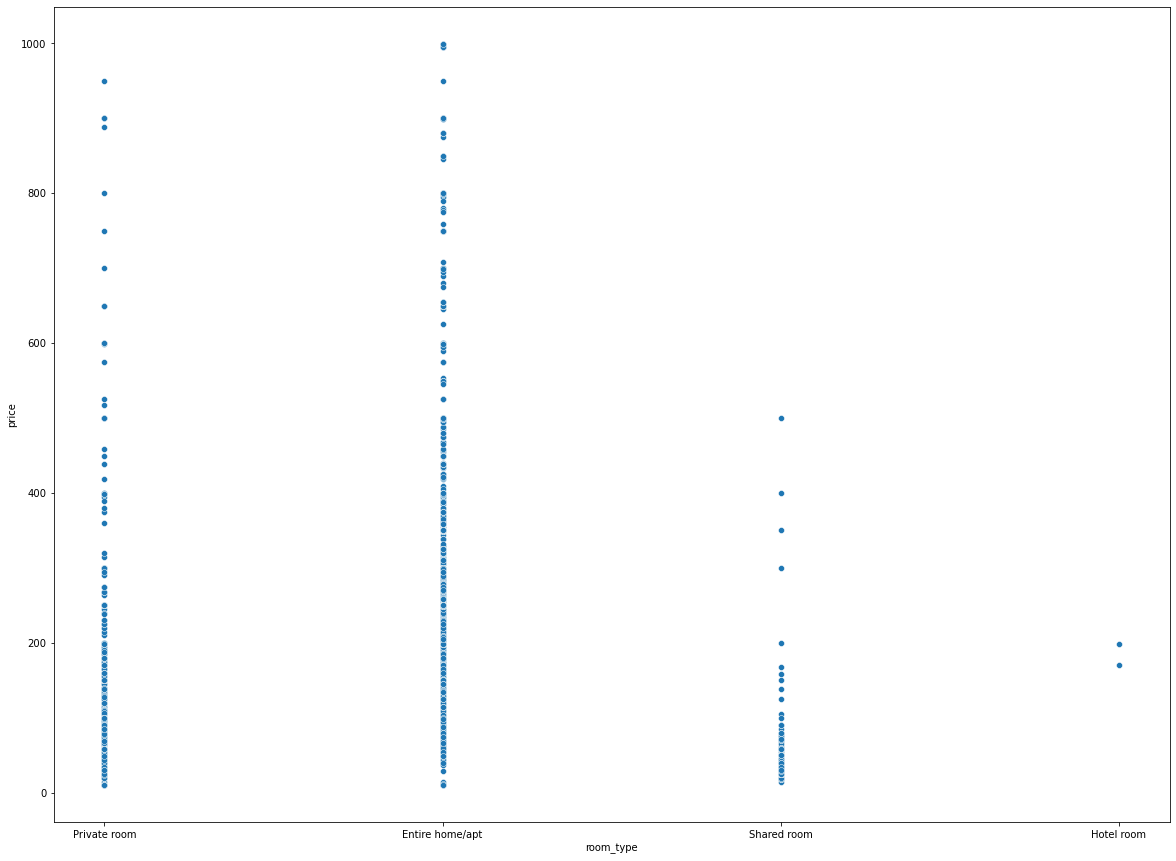

In [16]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price", data=data1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

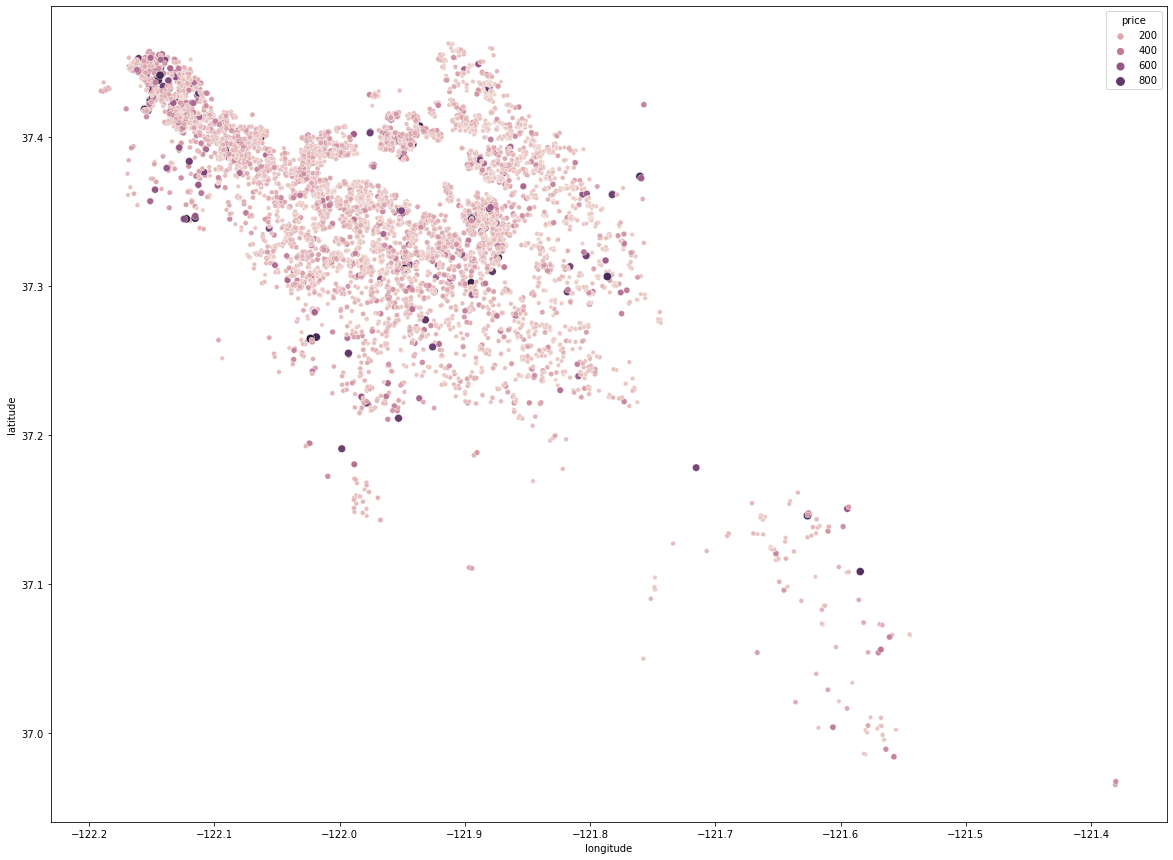

In [17]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="longitude", y="latitude",
            hue="price", size="price",data=data1)

C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

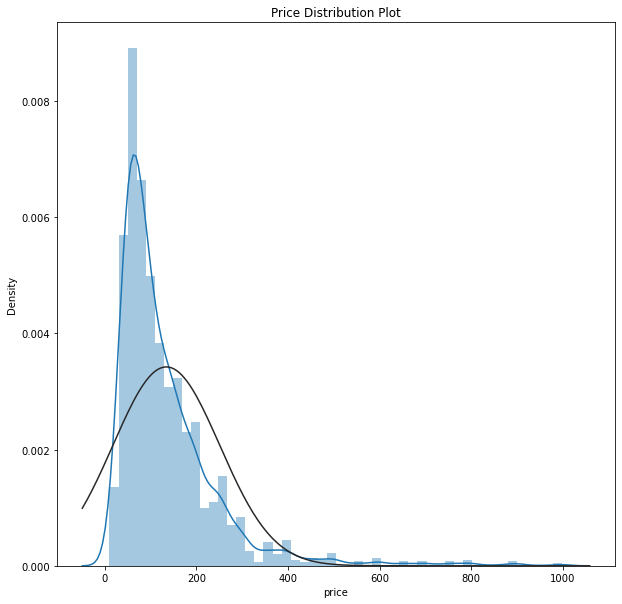

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(data1['price'], fit=norm)
plt.title("Price Distribution Plot")

right-skewed distribution on price.  positive skewness
Log transformation will be used 

In [19]:
data1['price_log'] = np.log(data1.price+1)

<ipython-input-19-2f7c4673f4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price_log'] = np.log(data1.price+1)


C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

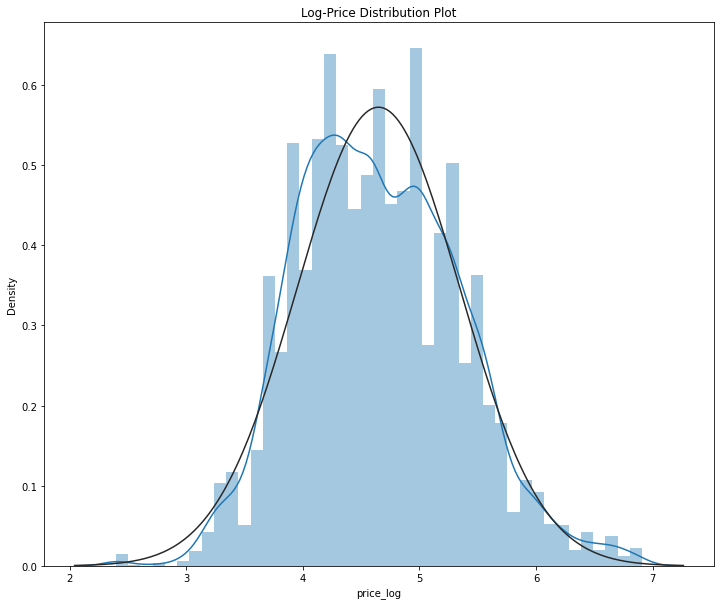

In [20]:
plt.figure(figsize=(12,10))
sns.distplot(data1['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot")

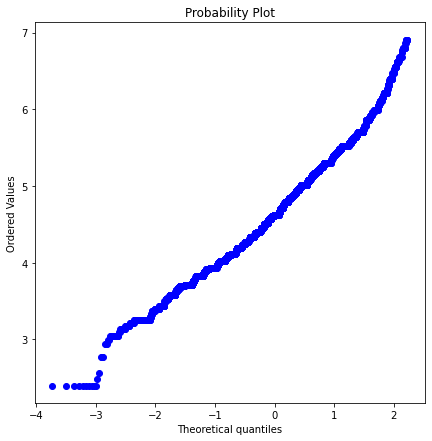

In [21]:
plt.figure(figsize=(7,7))
stats.probplot(data1['price_log'], plot=plt)
plt.show()

In [41]:
dfprice = data1[['neighbourhood_cleansed', 'price','price_log','bedrooms','room_type','longitude', 'latitude','accommodates','bathrooms']]

In [42]:
dfprice

,neighbourhood_cleansed,price,price_log,bedrooms,room_type,longitude,latitude,accommodates,bathrooms
0,Palo Alto,90.0,4.510860,1.0,Private room,-122.15672,37.43972,2,2.0
1,Santa Clara,85.0,4.454347,NaN,Entire home/apt,-121.98829,37.34342,1,1.0
2,Mountain View,65.0,4.189655,1.0,Entire home/apt,-122.07357,37.38612,2,1.0
3,Palo Alto,99.0,4.605170,1.0,Private room,-122.15667,37.44001,1,2.0
4,San Jose,52.0,3.970292,1.0,Private room,-121.84036,37.30598,2,1.0
...,...,...,...,...,...,...,...,...,...
7216,San Jose,49.0,3.912023,0.0,Entire home/apt,-121.87189,37.33794,1,1.0
7217,Santa Clara,135.0,4.912655,1.0,Entire home/apt,-121.99940,37.35473,4,1.0
7218,Sunnyvale,85.0,4.454347,1.0,Private room,-122.02541,37.39309,1,1.0
7219,San Jose,49.0,3.912023,1.0,Private room,-121.92103,37.31209,1,1.0


In [44]:
dfprice['room_type'].value_counts()

Private room       3454
Entire home/apt    3431
Shared room         334
Hotel room            2
Name: room_type, dtype: int64

In [45]:
    minimum=min(dfprice_encoded['price_log'])
    maximum=max(dfprice_encoded['price_log'])
    dfprice_encoded['price_log'] = (dfprice_encoded['price_log']-minimum)/(maximum-minimum)
    dfprice_encoded

,price,price_log,bedrooms,longitude,latitude,neighbourhood_cleansed_Campbell,neighbourhood_cleansed_Cupertino,neighbourhood_cleansed_Gilroy,neighbourhood_cleansed_Los Altos,neighbourhood_cleansed_Los Altos Hills,neighbourhood_cleansed_Los Gatos,neighbourhood_cleansed_Milpitas,neighbourhood_cleansed_Monte Sereno,neighbourhood_cleansed_Morgan Hill,neighbourhood_cleansed_Mountain View,neighbourhood_cleansed_Palo Alto,neighbourhood_cleansed_San Jose,neighbourhood_cleansed_Santa Clara,neighbourhood_cleansed_Saratoga,neighbourhood_cleansed_Sunnyvale,neighbourhood_cleansed_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,90.0,0.468521,1.0,-122.15672,37.43972,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,65.0,0.397298,1.0,-122.07357,37.38612,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,99.0,0.489433,1.0,-122.15667,37.44001,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,52.0,0.348658,1.0,-121.84036,37.30598,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,110.0,0.512574,1.0,-122.13733,37.45356,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,49.0,0.335737,0.0,-121.87189,37.33794,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7217,135.0,0.557614,1.0,-121.99940,37.35473,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7218,85.0,0.455990,1.0,-122.02541,37.39309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7219,49.0,0.335737,1.0,-121.92103,37.31209,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [48]:
dfprice_encoded = pd.get_dummies(dfprice,columns=['neighbourhood_cleansed','room_type'])
dfprice_encoded.head()

,price,price_log,bedrooms,longitude,latitude,accommodates,bathrooms,neighbourhood_cleansed_Campbell,neighbourhood_cleansed_Cupertino,neighbourhood_cleansed_Gilroy,neighbourhood_cleansed_Los Altos,neighbourhood_cleansed_Los Altos Hills,neighbourhood_cleansed_Los Gatos,neighbourhood_cleansed_Milpitas,neighbourhood_cleansed_Monte Sereno,neighbourhood_cleansed_Morgan Hill,neighbourhood_cleansed_Mountain View,neighbourhood_cleansed_Palo Alto,neighbourhood_cleansed_San Jose,neighbourhood_cleansed_Santa Clara,neighbourhood_cleansed_Saratoga,neighbourhood_cleansed_Sunnyvale,neighbourhood_cleansed_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,90.0,4.510860,1.0,-122.15672,37.43972,2,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,85.0,4.454347,NaN,-121.98829,37.34342,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,65.0,4.189655,1.0,-122.07357,37.38612,2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,99.0,4.605170,1.0,-122.15667,37.44001,1,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,52.0,3.970292,1.0,-121.84036,37.30598,2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [49]:
dup=dfprice_encoded.isnull().sum()/dfprice_encoded.shape[0]
pd.set_option('display.max_rows', dup.shape[0]+1)


print(dup)

price                                          0.012741
price_log                                      0.012741
bedrooms                                       0.000831
longitude                                      0.000000
latitude                                       0.000000
accommodates                                   0.000000
bathrooms                                      0.000138
neighbourhood_cleansed_Campbell                0.000000
neighbourhood_cleansed_Cupertino               0.000000
neighbourhood_cleansed_Gilroy                  0.000000
neighbourhood_cleansed_Los Altos               0.000000
neighbourhood_cleansed_Los Altos Hills         0.000000
neighbourhood_cleansed_Los Gatos               0.000000
neighbourhood_cleansed_Milpitas                0.000000
neighbourhood_cleansed_Monte Sereno            0.000000
neighbourhood_cleansed_Morgan Hill             0.000000
neighbourhood_cleansed_Mountain View           0.000000
neighbourhood_cleansed_Palo Alto               0

In [50]:
dfprice_encoded.loc[(dfprice_encoded['bedrooms']==''),'bedrooms'] = 0

In [51]:
dup=dfprice_encoded.isnull().sum()/dfprice_encoded.shape[0]
pd.set_option('display.max_rows', dup.shape[0]+1)


print(dup)

price                                          0.012741
price_log                                      0.012741
bedrooms                                       0.000831
longitude                                      0.000000
latitude                                       0.000000
accommodates                                   0.000000
bathrooms                                      0.000138
neighbourhood_cleansed_Campbell                0.000000
neighbourhood_cleansed_Cupertino               0.000000
neighbourhood_cleansed_Gilroy                  0.000000
neighbourhood_cleansed_Los Altos               0.000000
neighbourhood_cleansed_Los Altos Hills         0.000000
neighbourhood_cleansed_Los Gatos               0.000000
neighbourhood_cleansed_Milpitas                0.000000
neighbourhood_cleansed_Monte Sereno            0.000000
neighbourhood_cleansed_Morgan Hill             0.000000
neighbourhood_cleansed_Mountain View           0.000000
neighbourhood_cleansed_Palo Alto               0

In [52]:
dfprice_encoded.dtypes

price                                          float64
price_log                                      float64
bedrooms                                       float64
longitude                                      float64
latitude                                       float64
accommodates                                     int64
bathrooms                                      float64
neighbourhood_cleansed_Campbell                  uint8
neighbourhood_cleansed_Cupertino                 uint8
neighbourhood_cleansed_Gilroy                    uint8
neighbourhood_cleansed_Los Altos                 uint8
neighbourhood_cleansed_Los Altos Hills           uint8
neighbourhood_cleansed_Los Gatos                 uint8
neighbourhood_cleansed_Milpitas                  uint8
neighbourhood_cleansed_Monte Sereno              uint8
neighbourhood_cleansed_Morgan Hill               uint8
neighbourhood_cleansed_Mountain View             uint8
neighbourhood_cleansed_Palo Alto                 uint8
neighbourh

IndexError: index 25 is out of bounds for axis 0 with size 25

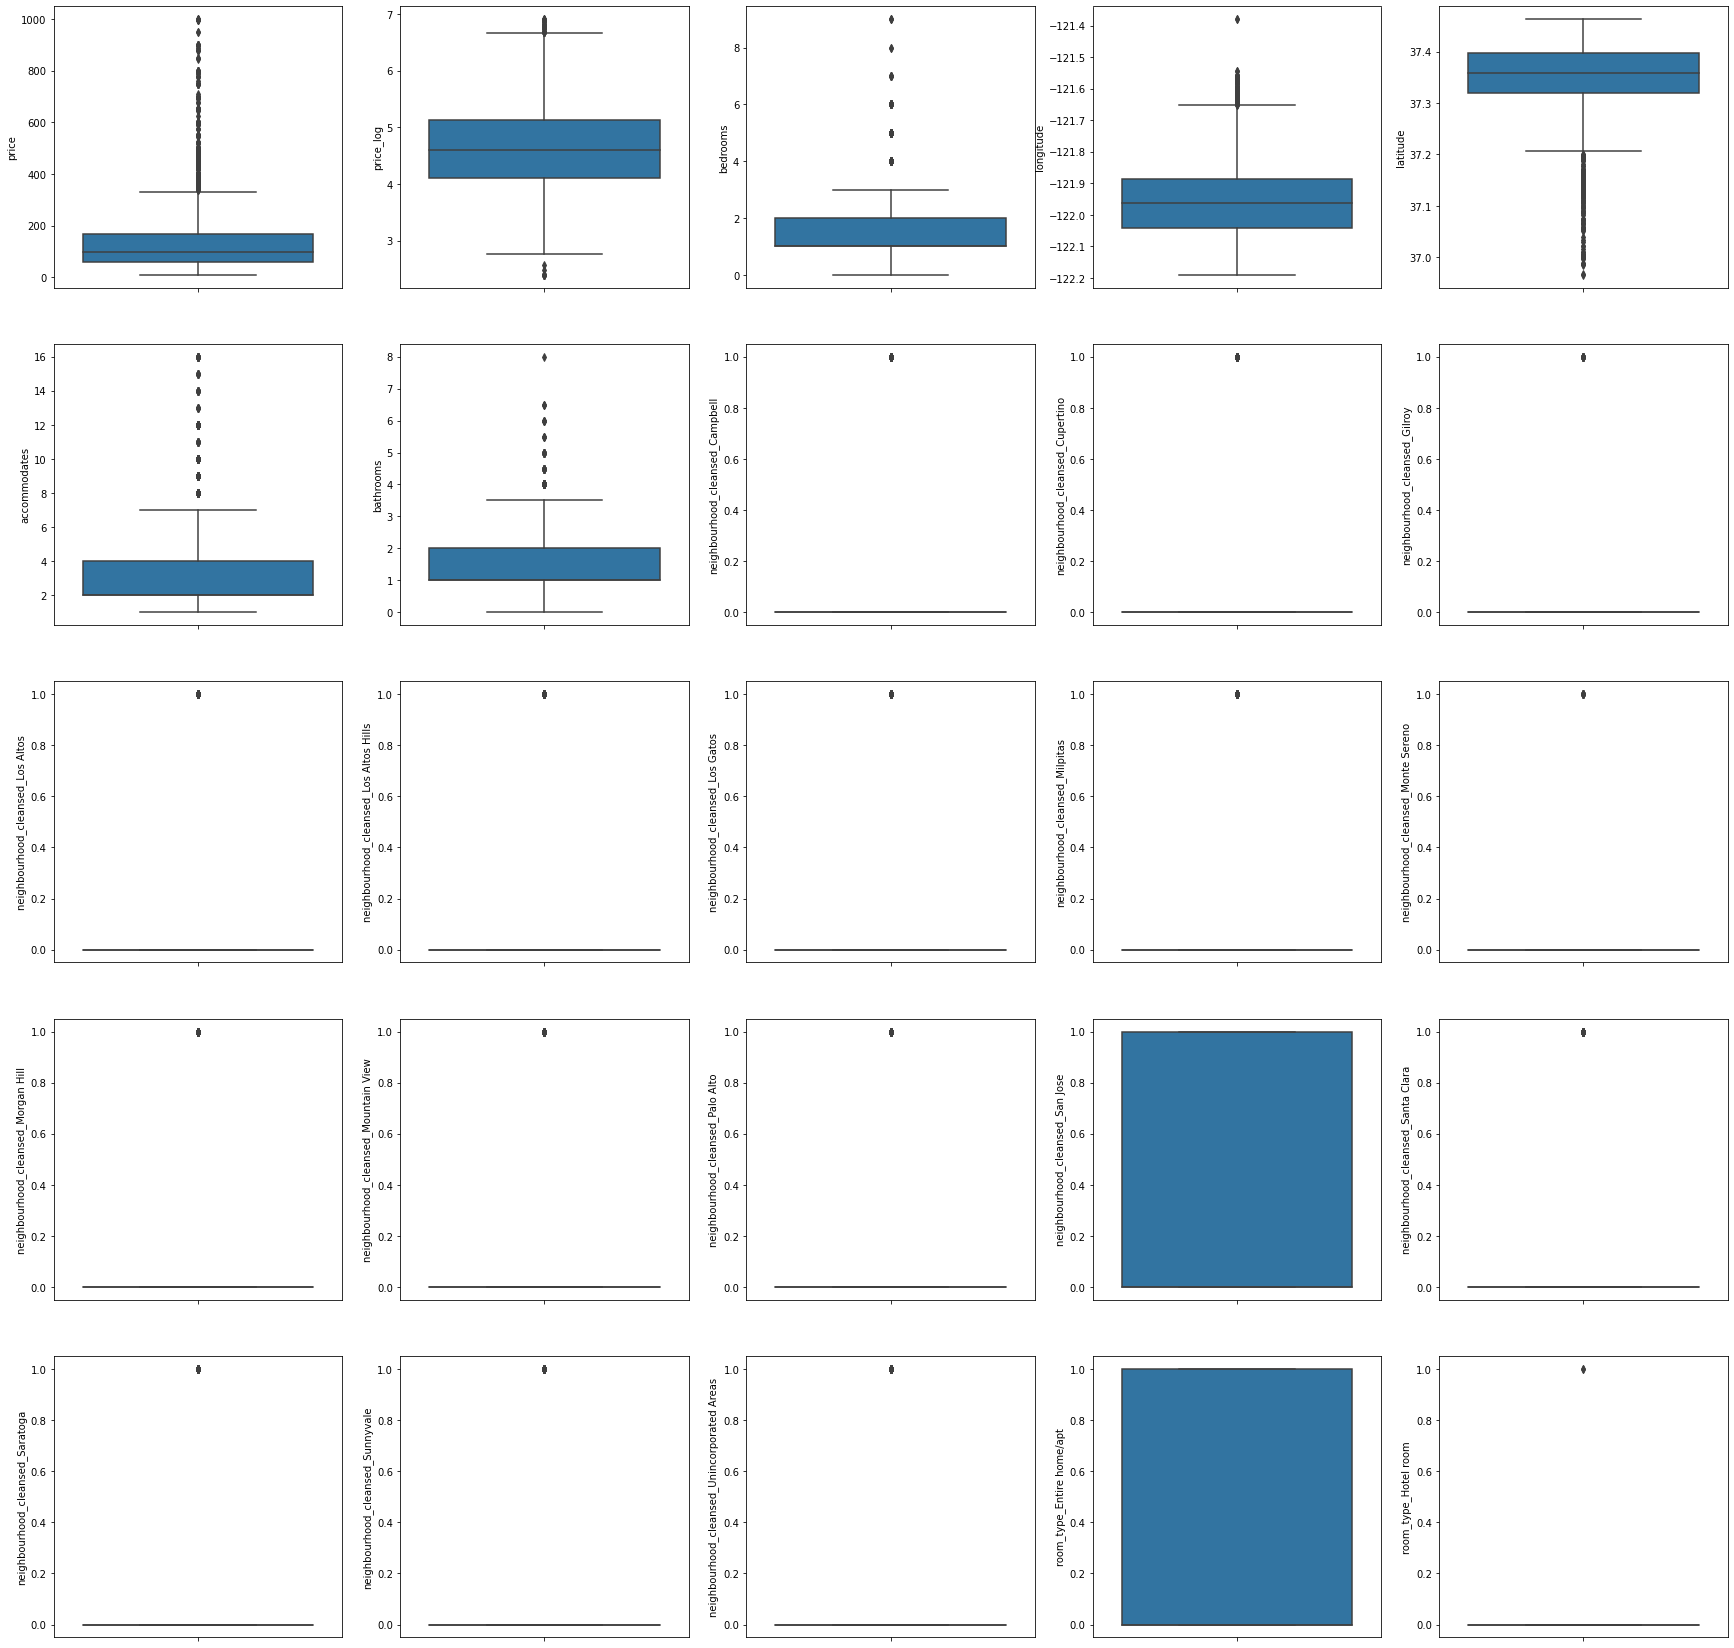

In [53]:
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(30,30))
index=0
ax=ax.flatten()
for col, value in dfprice_encoded.items():
    sns.boxplot(y=col, data=dfprice_encoded, ax = ax[index])
    index +=1

C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\gaode\anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot`

IndexError: index 25 is out of bounds for axis 0 with size 25

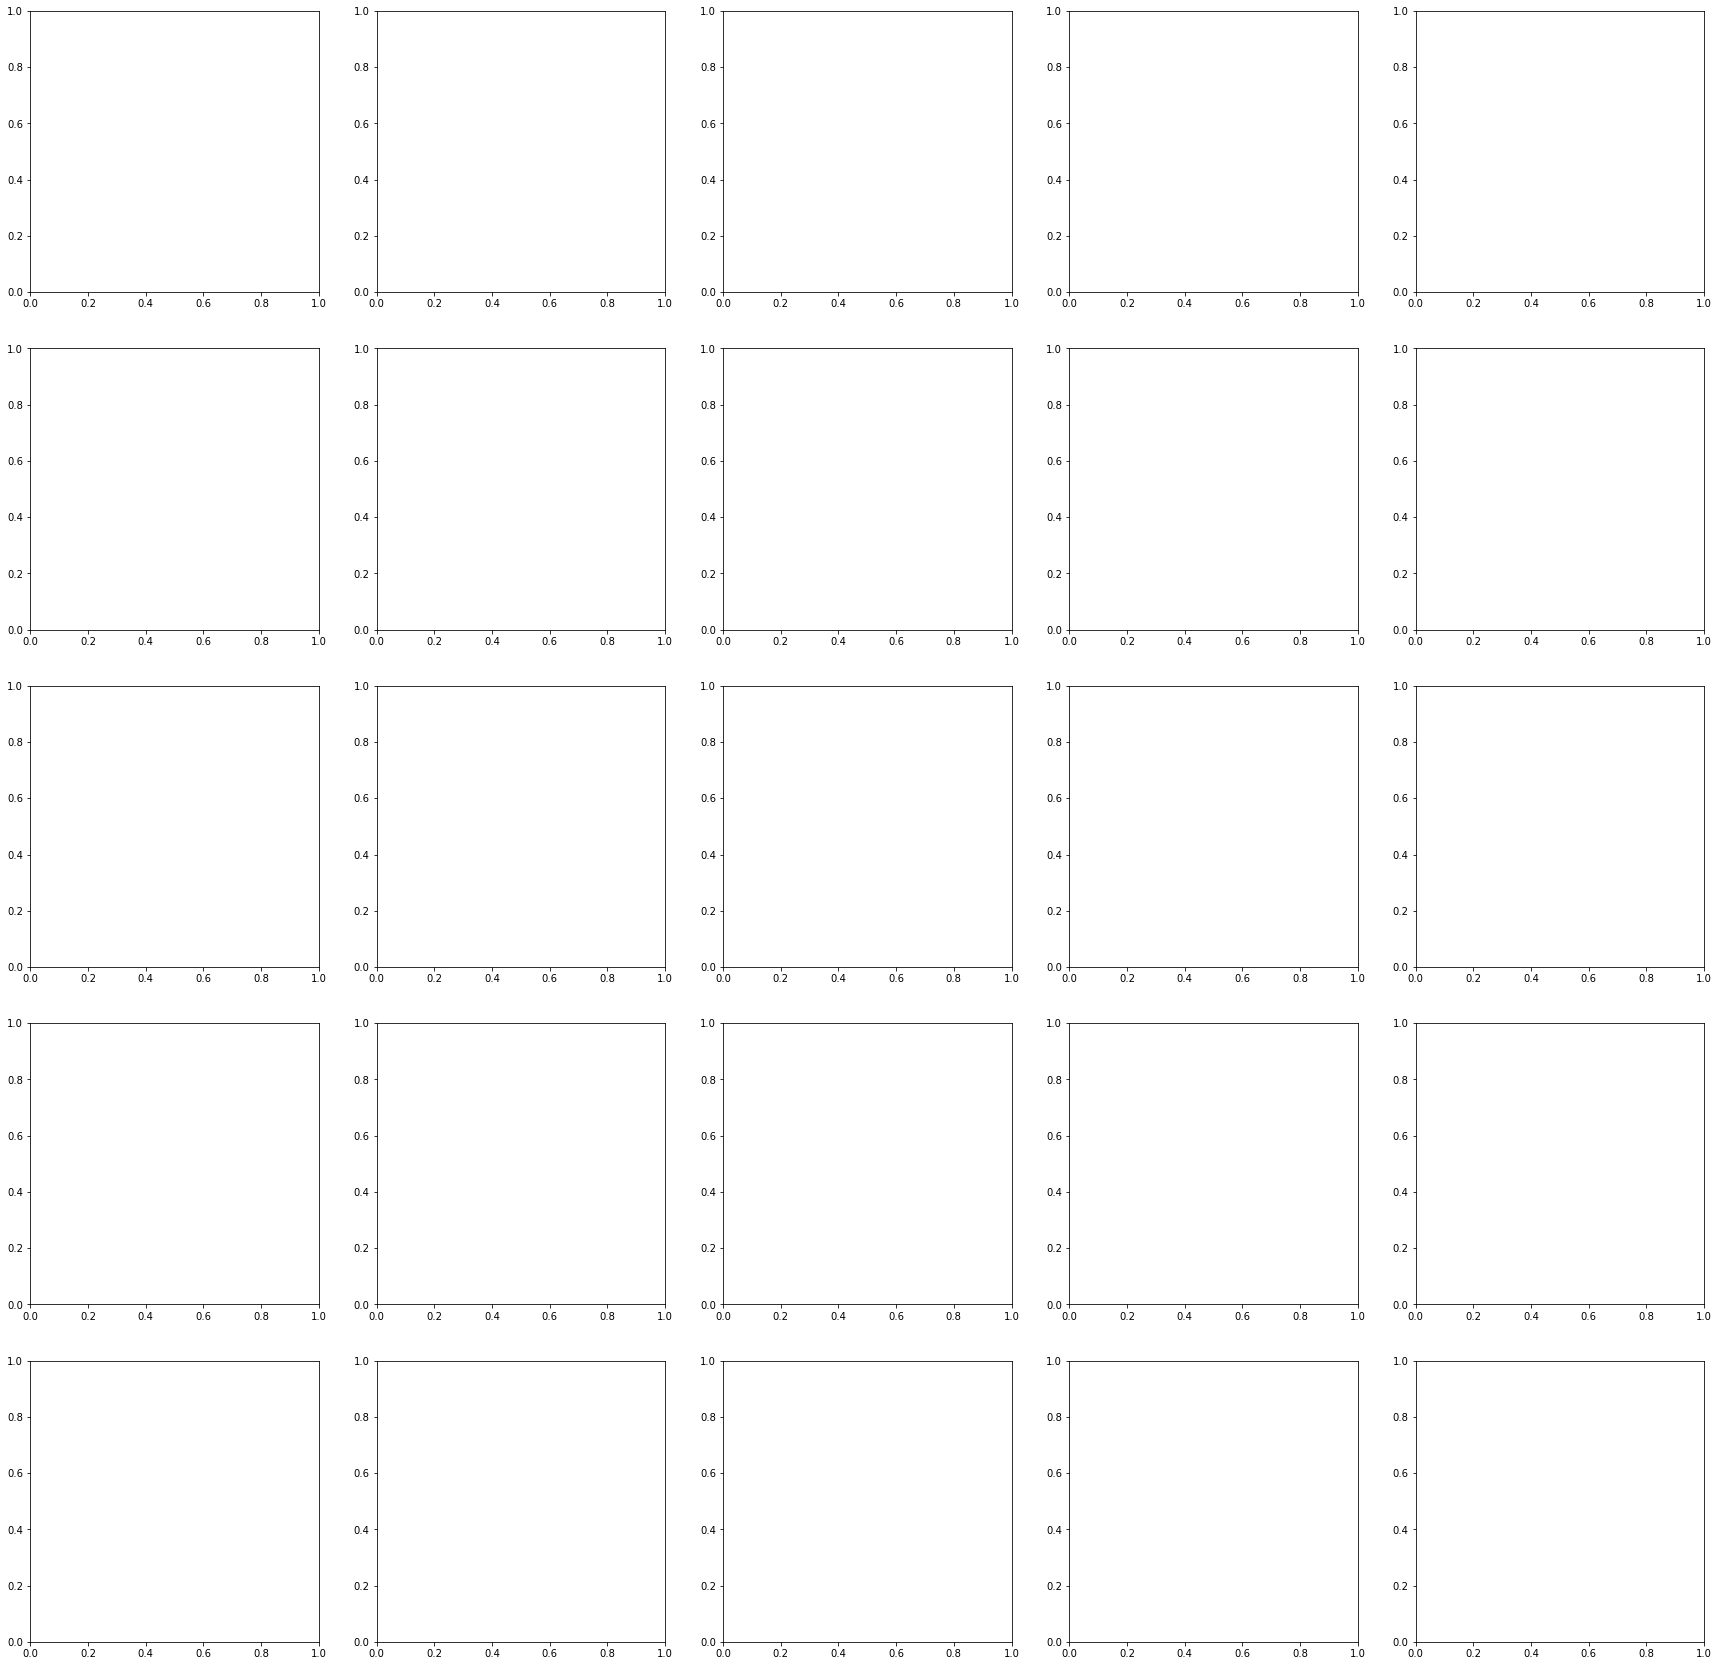

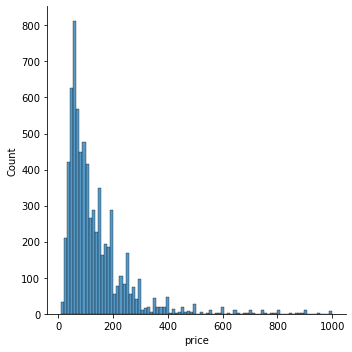

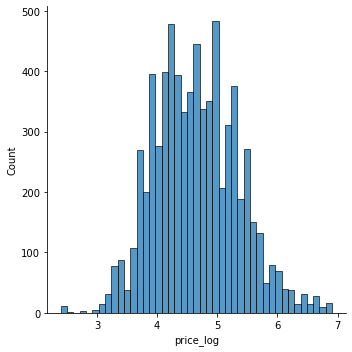

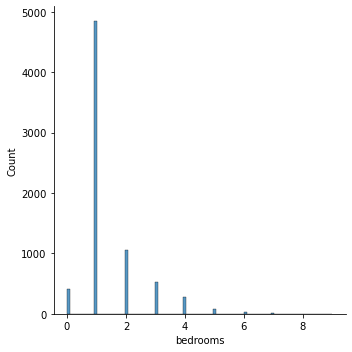

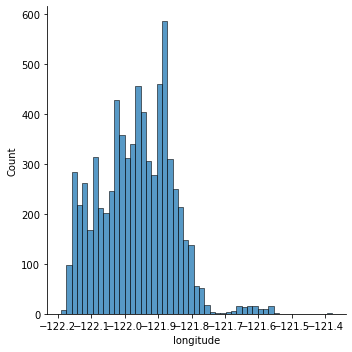

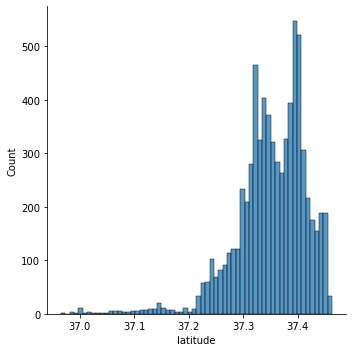

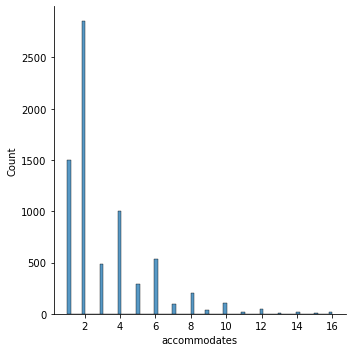

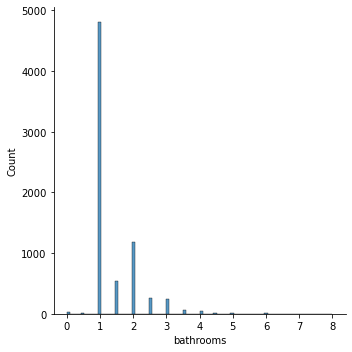

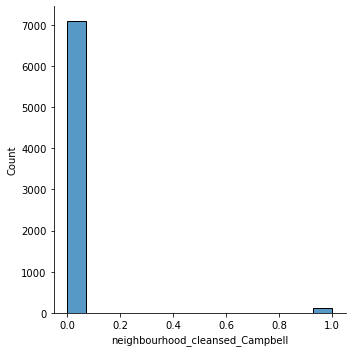

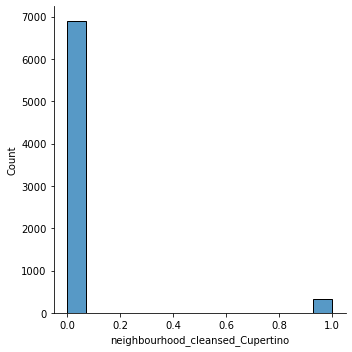

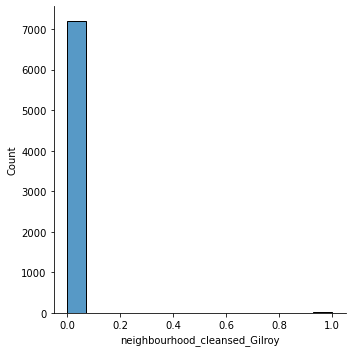

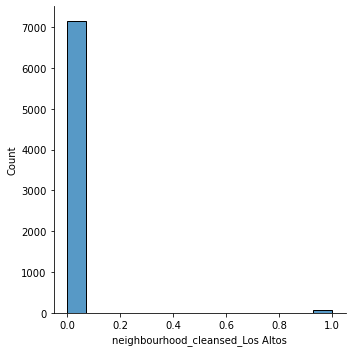

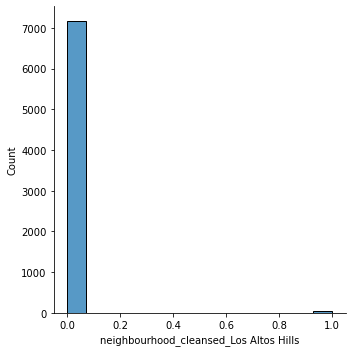

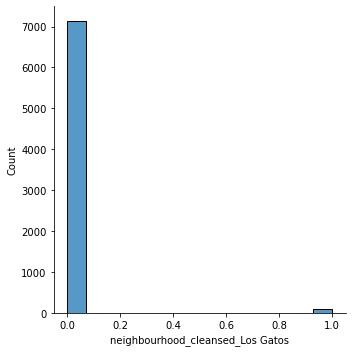

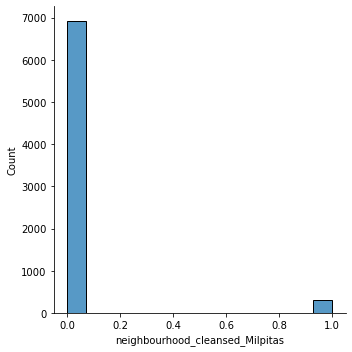

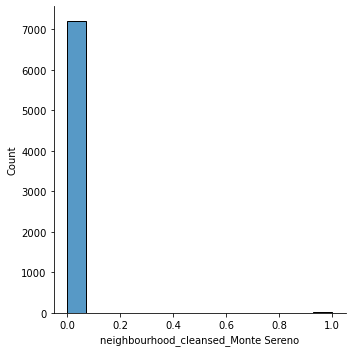

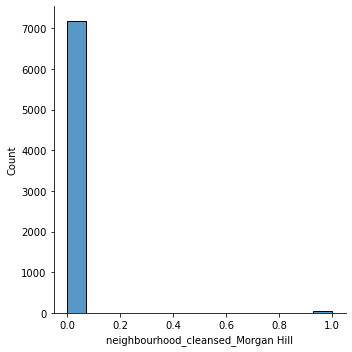

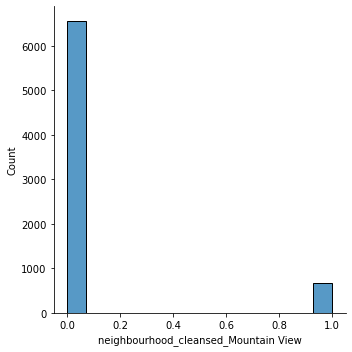

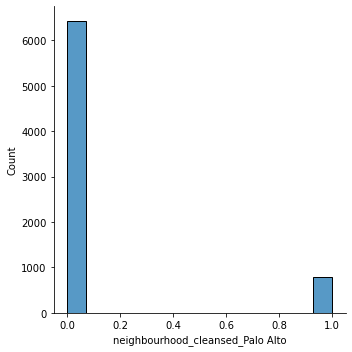

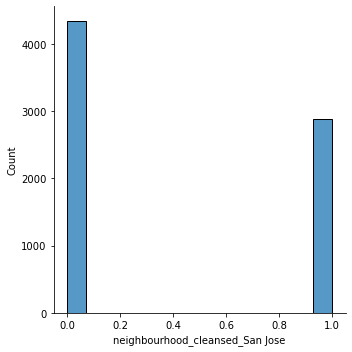

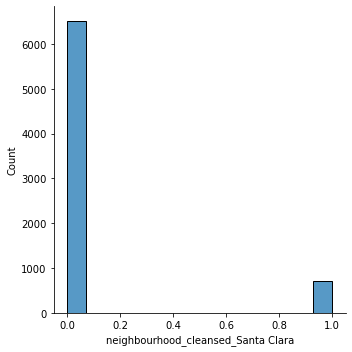

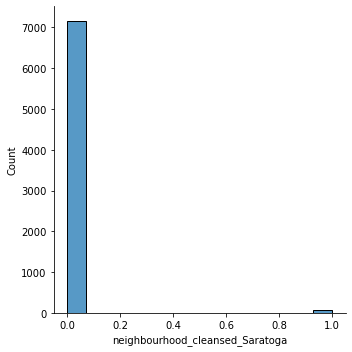

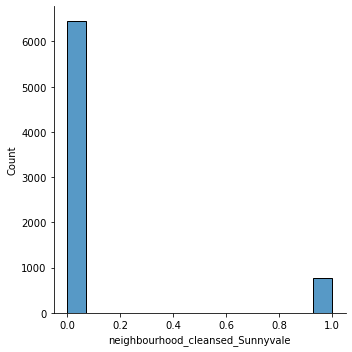

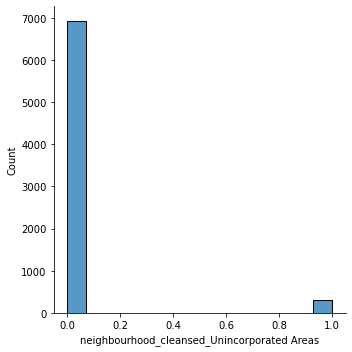

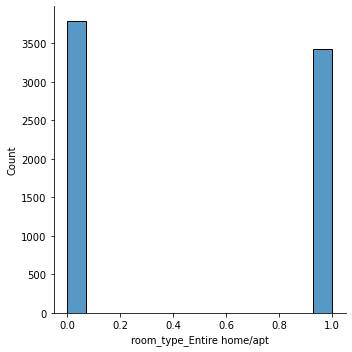

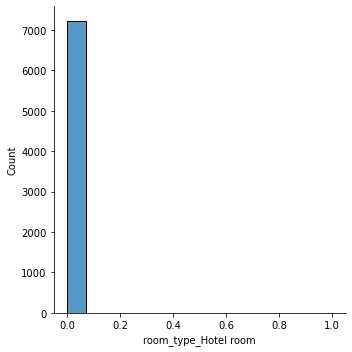

In [54]:
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(30,30))
index=0
ax=ax.flatten()
for col, value in dfprice_encoded.items():
    sns.displot(value, ax = ax[index])
    index +=1

In [ ]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=dfprice_encoded.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(25, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [55]:
dfprice_encoded.drop(['longitude','latitude'], axis = 1)


,price,price_log,bedrooms,accommodates,bathrooms,neighbourhood_cleansed_Campbell,neighbourhood_cleansed_Cupertino,neighbourhood_cleansed_Gilroy,neighbourhood_cleansed_Los Altos,neighbourhood_cleansed_Los Altos Hills,neighbourhood_cleansed_Los Gatos,neighbourhood_cleansed_Milpitas,neighbourhood_cleansed_Monte Sereno,neighbourhood_cleansed_Morgan Hill,neighbourhood_cleansed_Mountain View,neighbourhood_cleansed_Palo Alto,neighbourhood_cleansed_San Jose,neighbourhood_cleansed_Santa Clara,neighbourhood_cleansed_Saratoga,neighbourhood_cleansed_Sunnyvale,neighbourhood_cleansed_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,90.0,4.510860,1.0,2,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,85.0,4.454347,NaN,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,65.0,4.189655,1.0,2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,99.0,4.605170,1.0,1,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,52.0,3.970292,1.0,2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,49.0,3.912023,0.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7217,135.0,4.912655,1.0,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7218,85.0,4.454347,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7219,49.0,3.912023,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [56]:
dfprice_encoded.isnull().sum()
dfprice_encoded.dropna(how='any',inplace=True)
dfprice_encoded.info() 
dup=dfprice_encoded.isnull().sum()/dfprice_encoded.shape[0]
pd.set_option('display.max_rows', dup.shape[0]+1)

dfprice_encoded


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122 entries, 0 to 7220
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   price                                        7122 non-null   float64
 1   price_log                                    7122 non-null   float64
 2   bedrooms                                     7122 non-null   float64
 3   longitude                                    7122 non-null   float64
 4   latitude                                     7122 non-null   float64
 5   accommodates                                 7122 non-null   int64  
 6   bathrooms                                    7122 non-null   float64
 7   neighbourhood_cleansed_Campbell              7122 non-null   uint8  
 8   neighbourhood_cleansed_Cupertino             7122 non-null   uint8  
 9   neighbourhood_cleansed_Gilroy                7122 non-null   uint8  
 10  

,price,price_log,bedrooms,longitude,latitude,accommodates,bathrooms,neighbourhood_cleansed_Campbell,neighbourhood_cleansed_Cupertino,neighbourhood_cleansed_Gilroy,neighbourhood_cleansed_Los Altos,neighbourhood_cleansed_Los Altos Hills,neighbourhood_cleansed_Los Gatos,neighbourhood_cleansed_Milpitas,neighbourhood_cleansed_Monte Sereno,neighbourhood_cleansed_Morgan Hill,neighbourhood_cleansed_Mountain View,neighbourhood_cleansed_Palo Alto,neighbourhood_cleansed_San Jose,neighbourhood_cleansed_Santa Clara,neighbourhood_cleansed_Saratoga,neighbourhood_cleansed_Sunnyvale,neighbourhood_cleansed_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,90.0,4.510860,1.0,-122.15672,37.43972,2,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,65.0,4.189655,1.0,-122.07357,37.38612,2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,99.0,4.605170,1.0,-122.15667,37.44001,1,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,52.0,3.970292,1.0,-121.84036,37.30598,2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,110.0,4.709530,1.0,-122.13733,37.45356,2,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,49.0,3.912023,0.0,-121.87189,37.33794,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7217,135.0,4.912655,1.0,-121.99940,37.35473,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7218,85.0,4.454347,1.0,-122.02541,37.39309,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7219,49.0,3.912023,1.0,-121.92103,37.31209,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [58]:
#X=dfprice_encoded.drop(columns=['price','price_log','latitude','longitude'])
X=dfprice_encoded[['bedrooms','accommodates','bathrooms','neighbourhood_cleansed_Palo Alto','neighbourhood_cleansed_San Jose','neighbourhood_cleansed_Mountain View','room_type_Entire home/apt','room_type_Private room']]
y=dfprice_encoded['price_log']

In [75]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    x_train, x_test, y_train, y_test=train_test_split(X,y,random_state=42)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    cv_score=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE",mean_squared_error(y_test,pred))
    print('CV Score', cv_score)
    y_pred = model.predict(x_test)
    plt.scatter(y_test,y_pred,color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

Model Report
MSE 0.1911469194923997
CV Score 0.18852987196717524


neighbourhood_cleansed_San Jose        -0.088004
bathrooms                              -0.012892
accommodates                            0.065991
neighbourhood_cleansed_Mountain View    0.081633
bedrooms                                0.149115
neighbourhood_cleansed_Palo Alto        0.233137
room_type_Private room                  0.693203
room_type_Entire home/apt               1.252339
dtype: float64

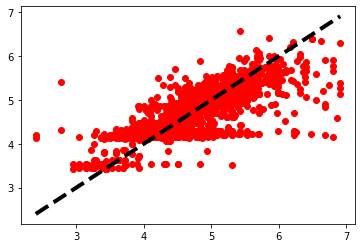

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model,X,y)
#coef = pd.Series(model.coef_, X.columns).sort_values()
#coef.plot(kind='bar',title='Model Coefficients')
coef
#y_pred = model.predict(x_test)